En este archivo realizo el EDA de cada csv creado por moneda, trayendome el DF que contiene, fechas desde enero del 2020 hasta la actualidad, precio de cierre, capitalizacion de mercado y volumen del mercado (la cantidad de una criptomoneda que se ha comprado y vendido en todos los intercambios en el dia)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import time as t
import plotly.graph_objects as go
sns.set()


## BNB
* BNB se lanzó a través de una oferta inicial de monedas en 2017, 11 días antes de que el exchange de criptomonedas Binance se pusiera en marcha
* Originalmente se emitió como un token ERC-20 que se ejecutaba en la red de Ethereum, con un suministro total limitado a 200 millones de monedas y 100 millones de BNB ofrecidos en la ICO. Sin embargo, las monedas BNB ERC-20 se intercambiaron con BEP2 BNB en una proporción de 1:1 en abril de 2019 con el lanzamiento de la red principal de Binance Chain, y ahora ya no están alojadas en Ethereum.
* BNB es la moneda nativa de la plataforma de intercambio Binance. Se utiliza para pagar tarifas de transacción en la plataforma y ha ganado popularidad debido a su utilidad y a las ventas de tokens en la plataforma.


In [2]:
bnb= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\bnb.csv')

In [3]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHAS          1327 non-null   object 
 1   PRECIO-usd      1327 non-null   float64
 2   MARKET_CAP-usd  1327 non-null   float64
 3   TOTAL_VOLUMES   1327 non-null   float64
 4   COIN_ID         1327 non-null   object 
dtypes: float64(3), object(2)
memory usage: 52.0+ KB


In [4]:
bnb.describe()

,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES
count,1327.000000,1.327000e+03,1.327000e+03
mean,249.350114,3.999175e+10,1.382912e+09
std,174.039387,2.846131e+10,1.783184e+09
min,9.400671,1.431388e+09,1.776448e+07
25%,30.334558,4.484920e+09,3.791211e+08
50%,278.867987,4.473395e+10,8.045667e+08
75%,351.855825,5.489405e+10,1.683519e+09
max,675.098974,1.104412e+11,2.210352e+10


Aca tenemos el analisis estadistico de los valores historicos de precio desde enero del 2020 a la actualidad. Podemos ver que el promedio es 249 usd, tiene un minimo de 9 usd un un maximo de 675 . Tambien podemos ver market cap y volumen de intercambio.

In [5]:
bnb['FECHAS']=pd.to_datetime(bnb['FECHAS'])

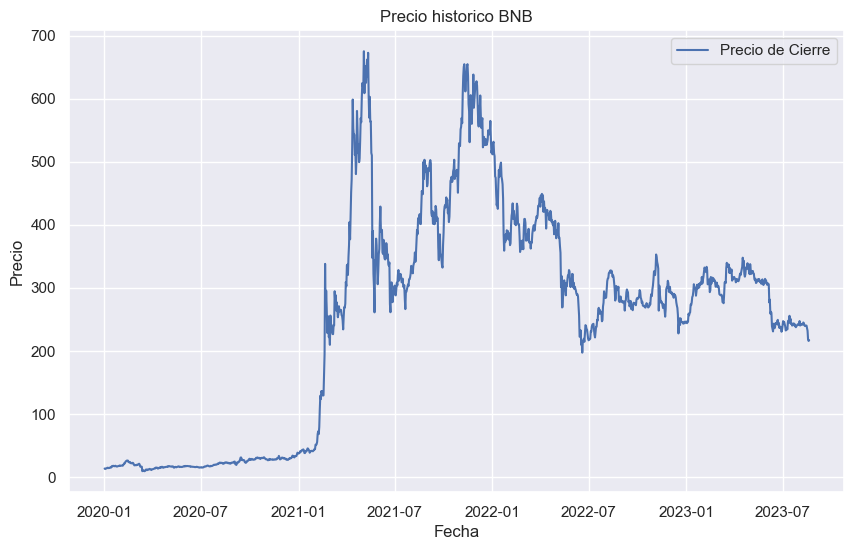

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(bnb['FECHAS'], bnb['PRECIO-usd'], label='Precio de Cierre')
plt.title('Precio historico BNB')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

Podemos ver como durante el 2020 el valor se mantuvo bajo y estable, luego en inicios del 2021 comienza a subir con alzas tambien en el mes de mayo de 2021, que llega a su pico maximo historico cercano a los 700 usd. Luego tiene picos en los que baha cerca de los 300, vuelvo a subir llegando a fines del 2021 y luego baja y se estabiliza llegando a rondar los 200 usd hasta la actualidad. 

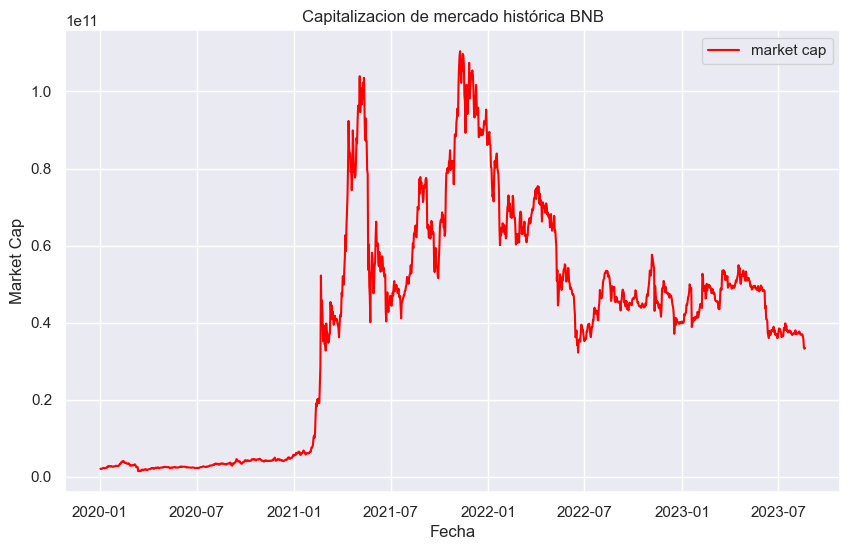

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(bnb['FECHAS'], bnb['MARKET_CAP-usd'], label='market cap', color='red')
plt.title('Capitalizacion de mercado histórica BNB')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.show()

Vemos como el grafico de capitalizacion de mercado se correlaciona con el de precio

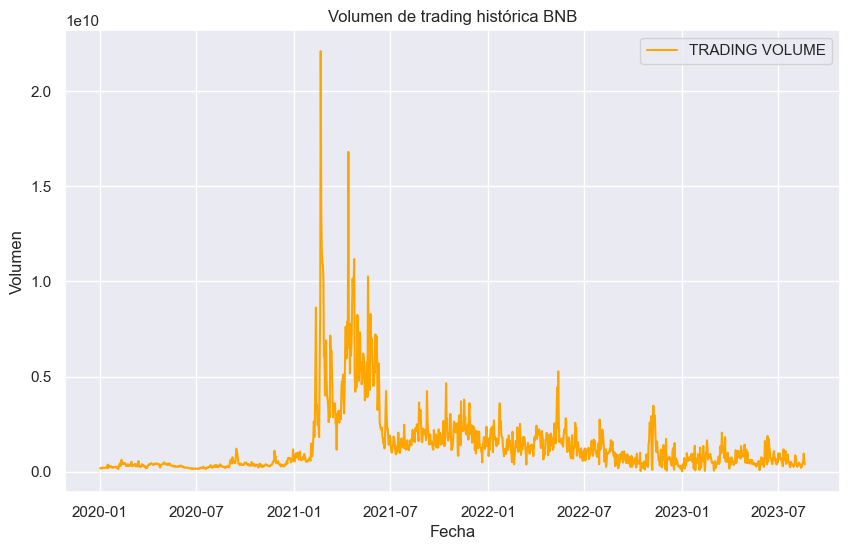

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(bnb['FECHAS'], bnb['TOTAL_VOLUMES'], label='TRADING VOLUME', color='orange')
plt.title('Volumen de trading histórica BNB')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

Y aca podemos ver como sus volumenes de traiding tienen el pico un poco antes de haber llegado a su valor historico máximo, y luego desciende.

## RSI 
(definido en el EDAbitcoin.ipynb)

In [9]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(bnb['PRECIO-usd'], window=rsi_period)
bnb['RSI'] = indicator.rsi()

bnb.tail()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI
1322,2023-08-16,236.607285,3.644085e+10,4.801982e+08,binancecoin,40.691369
1323,2023-08-17,232.095486,3.568297e+10,5.180758e+08,binancecoin,34.958068
1324,2023-08-18,217.795538,3.355258e+10,9.462674e+08,binancecoin,23.605660
1325,2023-08-19,215.972916,3.322978e+10,6.146381e+08,binancecoin,22.598348
1326,2023-08-20,217.075522,3.340955e+10,3.853982e+08,binancecoin,24.691967


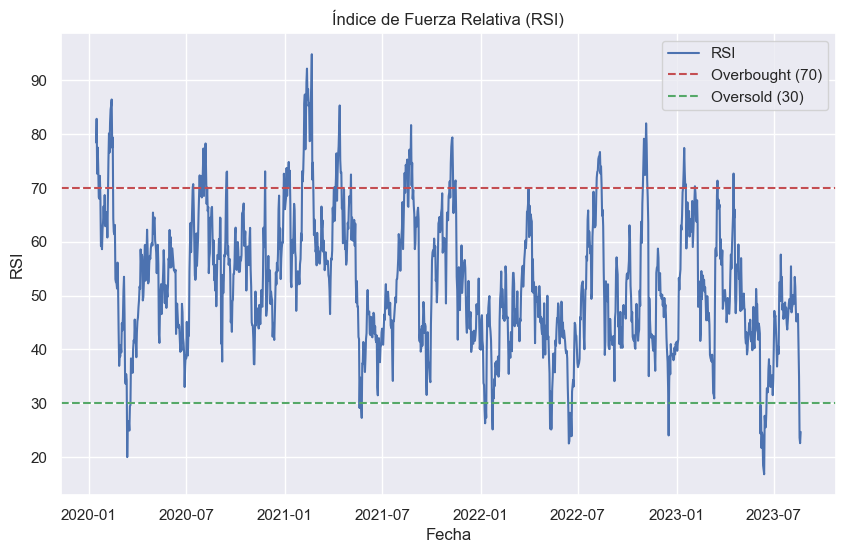

In [10]:
import matplotlib.pyplot as plt

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(bnb['FECHAS'], bnb['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

Vemos como el RSI muestra la sobrecompra en relacion al valor historico maximo

## MEDIA 
(definida en el EDAbitcoin.ipynb)


In [11]:
rolling_window = 50
bnb['MovingAverage'] = bnb['PRECIO-usd'].rolling(window=rolling_window).mean()

print(bnb.head())

      FECHAS  PRECIO-usd  MARKET_CAP-usd  TOTAL_VOLUMES      COIN_ID  RSI  \
0 2020-01-02   13.685902    2.099316e+09   1.847091e+08  binancecoin  NaN   
1 2020-01-03   13.007171    1.995648e+09   1.573566e+08  binancecoin  NaN   
2 2020-01-04   13.603276    2.088117e+09   1.772397e+08  binancecoin  NaN   
3 2020-01-05   13.794575    2.116144e+09   1.699075e+08  binancecoin  NaN   
4 2020-01-06   14.006361    2.147451e+09   1.834075e+08  binancecoin  NaN   

   MovingAverage  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


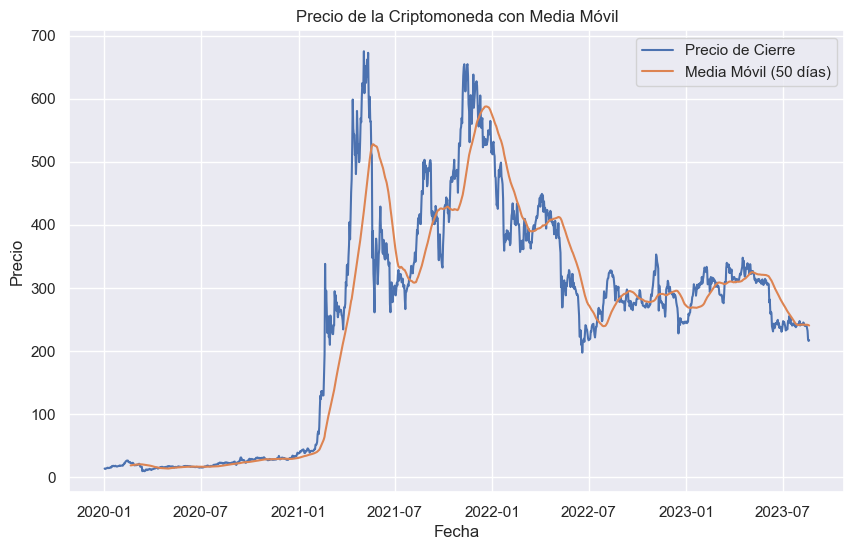

In [12]:
# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(bnb['FECHAS'], bnb['PRECIO-usd'], label='Precio de Cierre')
plt.plot(bnb['FECHAS'], bnb['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

La media movil se basa en valores del pasado para predecir tendencias, a corto plazo, y vemos como en el grafico acompaña.

In [13]:
bnb.to_csv('bnbDB.csv', index= False)